In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_TRIES = 50
SAMPLE_SIZE = 1000
SUCCESS_PROBABILITY = 1/10
COMPLEMENT_PROBABILITY_TO_SUCCESS = 1 - SUCCESS_PROBABILITY
num_successes = np.random.binomial(SAMPLE_SIZE, SUCCESS_PROBABILITY, NUM_TRIES)
num_failures = SAMPLE_SIZE - num_successes
probability_of_success = num_failures / SAMPLE_SIZE
overall_probability = sum(probability_of_success) / len(probability_of_success)
print(
    f""" Num successes: {num_successes} 
    \n\n Num successes: {num_failures} 
    \n\n Probability of success: {probability_of_success}
    \n\n Overall_probability: {overall_probability}
    """
)

 Num successes: [104 104 100  96 111  85  91 105  92  97  98 102  96  95  99 101 108  93
 101  95  93  82  89 101 101 102  98  94  99 104 100 102  86  93  78 112
  98  97 102 104  98  89 109  97 104  88 105  96 105 100] 
    

 Num successes: [896 896 900 904 889 915 909 895 908 903 902 898 904 905 901 899 892 907
 899 905 907 918 911 899 899 898 902 906 901 896 900 898 914 907 922 888
 902 903 898 896 902 911 891 903 896 912 895 904 895 900] 
    

 Probability of success: [0.896 0.896 0.9   0.904 0.889 0.915 0.909 0.895 0.908 0.903 0.902 0.898
 0.904 0.905 0.901 0.899 0.892 0.907 0.899 0.905 0.907 0.918 0.911 0.899
 0.899 0.898 0.902 0.906 0.901 0.896 0.9   0.898 0.914 0.907 0.922 0.888
 0.902 0.903 0.898 0.896 0.902 0.911 0.891 0.903 0.896 0.912 0.895 0.904
 0.895 0.9  ]
    

 Overall_probability: 0.9020200000000003
    


In [3]:
class GetFoodMatrix:
    
    def _get_left_ahead(self, matrix: np.array, num_step: int) -> np.array:
        """
        Creates submatrix from original matrix to get slice the fields that ants can eat to the left
        Parameters:
        -----------
        
        matrix: np.array - matrix to be sliced
        num_step: int - which step is it (slicing condition)
        
        Returns:
        --------
        matrix: np.array - returns sliced matrix
        """
        index_one_step_ahead = num_step + 1
        return matrix[
            0:index_one_step_ahead, 0:index_one_step_ahead
        ]

    def _get_right_ahead(self, matrix: np.array, num_step: int) -> np.array:
        """
        Creates submatrix from original matrix to get slice the fields that ants can eat to the right
        Parameters:
        -----------
        
        matrix: np.array - matrix to be sliced
        num_step: int - which step is it (slicing condition)
        
        Returns:
        --------
        matrix: np.array - returns sliced matrix
        """
        index_one_step_ahead = num_step + 1
        return matrix[
            0:index_one_step_ahead, -index_one_step_ahead:
        ]
    
    def slice_matrix(self, matrix: np.array, num_step: int, slice_type: str) -> np.array:
        """
        Creates submatrix from original matrix by specifying slice type
        Parameters:
        -----------
        
        matrix: np.array - matrix to be sliced
        num_step: int - which step is it (slicing condition)
        slice_type - which slice should be made
        
        Returns:
        --------
        matrix: np.array - returns sliced matrix
        """
        if slice_type == "right".lower():
            return self._get_left_ahead(matrix, num_step)
        else:
            return self._get_right_ahead(matrix, num_step)


In [4]:
from typing import Tuple

class CreatePheromoneScores:
    
    def _compute_direction_score(self, matrix: np.array, num_step: int, food_matrix: GetFoodMatrix):
        right_slice = food_matrix.slice_matrix(matrix, num_step, "right")
        left_slice = food_matrix.slice_matrix(matrix, num_step, "left")
        right_slice_sum = np.sum(right_slice)
        left_slice_sum = np.sum(left_slice)
        return right_slice_sum, left_slice_sum
    
    def _binomial_distribution(self, prob: float):
        from_binomial = np.random.binomial(1, prob)
        if from_binomial == 1:
            return 1
        else:
            return -1
    
    def compute_probabilities(self, matrix: np.array, num_step: int, food_matrix: GetFoodMatrix) -> Tuple[float, float]:
        pheromone_sum_right, pheromone_sum_left = self._compute_direction_score(matrix, num_step, food_matrix)
        p_l = 100 # konstanta
        self.p_right = (
            5 + np.square(pheromone_sum_left)
            / (
                (5 + np.square(pheromone_sum_left))
            )
        )
        move_per_step_prob = .5 + .5 * np.tanh(
                (pheromone_sum_right + pheromone_sum_left) / p_l - 1
            )
        move_per_step_prob = move_per_step_prob / 40
        self.p_right = self.p_right/10
        self.p_left = 1 - self.p_right
        #print(
        #    f"move_to_step_from_binomial: {self._binomial_distribution(move_per_step_prob)} \t move_per_step_prob: {move_per_step_prob}"
        #)
        return self._binomial_distribution(self.p_left), self._binomial_distribution(move_per_step_prob)
    
    

In [5]:
a = """
for ant in range(num_ants):
    matrix = matrix * np.random.uniform(1, 2)
    counter = 0
    for step in range(NUM_STEPS):
        step_value, prob_stop = p.compute_probabilities(matrix, step, food_matrix_slicer)
        step_value += step_value
        if counter == 0:
            counter += 1
            step_value = (NUM_STEPS) / 2
        lst_values.append(step_value)
    all_ants.append(lst_values)
    lst_values = []
"""

In [6]:
def simulate(NUM_STEPS):
    lst_values = []
    step_value = NUM_STEPS / 2
    prob_stop = 0
    counter = 0
    food_matrix_slicer, p = GetFoodMatrix(), CreatePheromoneScores()
    matrix = np.random.rand(NUM_STEPS, NUM_STEPS)
    for step in range(NUM_STEPS):
        matrix = matrix * np.random.uniform(1, 2)
        for step in range(NUM_STEPS):
            step_value_change, prob_stop = p.compute_probabilities(matrix, step, food_matrix_slicer)
            step_value += step_value_change
            if prob_stop == 1:
                return lst_values
            if counter == 0:
                counter += 1
                step_value = (NUM_STEPS) / 2
            lst_values.append(step_value)
        return lst_values

In [7]:
NUM_STEPS = 100
num_ants, prob_left, x, step_value, x_axis = 10, .2, 0, 0, np.linspace(1, NUM_STEPS, NUM_STEPS)
a, b = 0, 1 # uniform
mu, sigma = 0, .5 # Normal
all_ants, lst_values = [], []
DISTRIBUTION = "uniform"

for ant in range(num_ants):
    ants = simulate(NUM_STEPS)
    all_ants.append(ants) 

In [8]:
lst = []
max_len = np.max([len(i) for i in all_ants])
for ant in range(num_ants):
    len_ants = len(all_ants[ant])
    temp_ant = all_ants[ant]
    temp_ant[len_ants:] = [None for _ in range(max_len - len_ants)]
    lst.append(temp_ant)


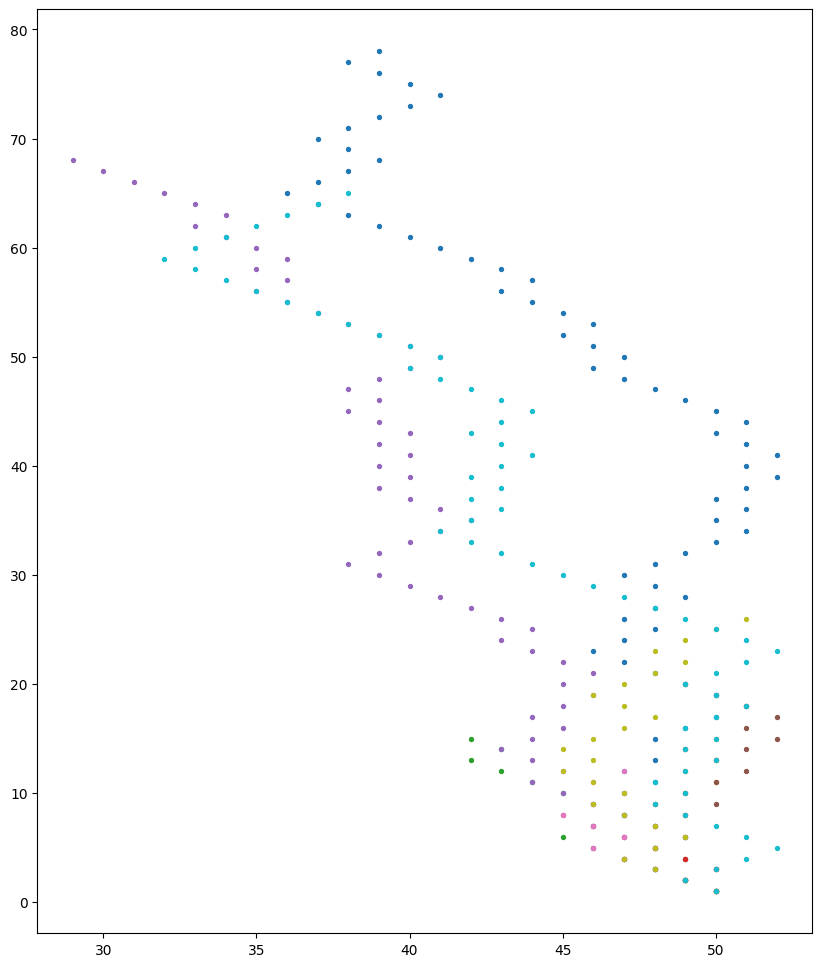

In [9]:
plt.figure(figsize=(10,12))
x_axis = np.linspace(1,  max_len, max_len)
for i in range(len(lst)):
    plt.scatter(lst[i], x_axis, s=8)  